In [62]:
%load_ext autoreload
%autoreload 2
import functools
import math
from vector_drawing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Exercise 2.6 
If the vector u = (–2, 0), the vector v = (1.5, 1.5), and the vector w = (4, 1), what are the results of u + v, v + w, and u + w? What is the result of u + v + w?

In [17]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

def exercise_26():
    u = (-2, 0)
    v = (1.5, 1.5)
    w = (4, 1)
    print(add(u, v))
    print(add(v, w))
    print(add(u, w))
    print(add(u, v, w))
    
    
exercise_2_6()

(-0.5, 1.5)
(5.5, 2.5)
(2, 1)
(3.5, 2.5)


#### Exercise 2.8 
Write a function translate(translation, vectors) that takes a translation vector and a list of input vectors, and returns a list of the input vectors all translated by the translation vector. For instance, translate ((1,1), [(0,0), (0,1,), (–3,–3)]) should return [(1,1),(1,2),(–2, –2)].


In [19]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

def exercise_28():
    print(translate ((1,1), [(0,0), (0,1,), (-3,-3)]))

exercise_2_8()

[(1, 1), (1, 2), (-2, -2)]


#### Exercise 2.9—Mini Project 
Any sum of vectors v + w gives the same result as w + v. Explain why this is true using the definition of the vector sum on coordinates. Also, draw a picture to show why it is true geometrically.



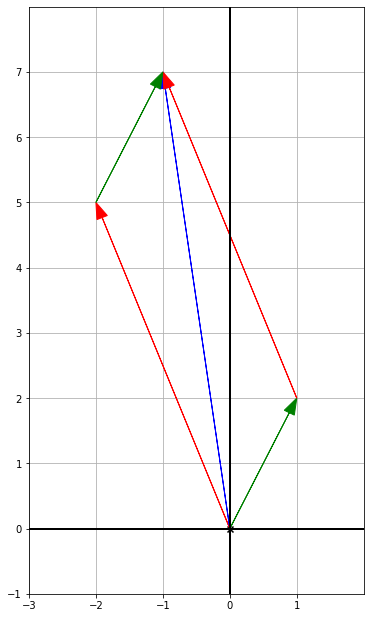

In [35]:
def exercise_2_9():
    u = (-2, 5)
    v = (1, 2)
    draw(Arrow(u, color="red"),
        Arrow(v, color="green"),
        Arrow(add(u,v), color="blue"),
        Arrow(add(u,v), tail=v, color="red"),
         Arrow(add(u,v), tail=u, color="green")
        )

exercise_2_9()

#### Exercise 2.11—Mini Project 
Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur. This shows the power of computer graphics; imagine how tedious it would be to specify all 2,100 coordinate pairs by hand!

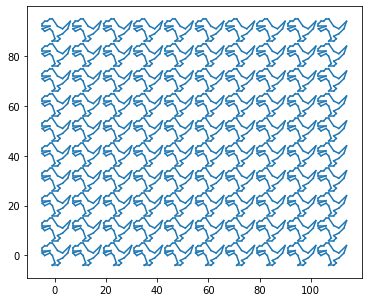

In [37]:
def hundred_dinos():
    dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
        (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
        (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
    ]
    translations = [(col * 12, row * 10)
                   for col in range(10)
                   for row in range(10)]
    translated = [translate(t, dino_vectors) for t in translations]
    dinos = [Polygon(*translated_dino) for translated_dino in translated]
    draw(
        *dinos, grid=None, axes=None, origin=None
    )
    
hundred_dinos()

#### Exercise 2.12 
Which is longer, the x or y component of (3, –2) + (1, 1) + (–2, –2)?

In [38]:
def exercise_2_12():
    v = add((3, -2), (1, 1), (-2, -2))
    print(v)
    
exercise_2_12()

(2, -3)


#### Exercise 2.13 
What are the components and lengths of the vectors (–6, –6) and (5, –12)?

In [46]:
def components(v):
    return [(v[0], 0), (0, v[1])]

def length(v):
    return sqrt(v[0] ** 2 + v[1] ** 2)
    
def exercise_2_13():
    u = (-6, -6)
    v = (5, -12)

    print(components(u))
    print(length(u))
    print(components(v))
    print(length(v))
    
exercise_2_13()

[(-6, 0), (0, -6)]
8.48528137423857
[(5, 0), (0, -12)]
13.0


#### Exercise 2.14 
Suppose I have a vector v that has a length of 6 and an x compo- nent (1, 0). What are the possible coordinates of v?

In [56]:
def solve_y(x, length):
    return sqrt((length ** 2) - (x ** 2))
    
def exercise_2_14():
    print(f"+/- {solve_y(1, 6)}")
    
exercise_2_14()

+/- 5.916079783099616


#### Exercise 2.15 
What vector in the dino_vectors list has the longest length? Use the length function we wrote to compute the answer quickly.

In [59]:

def exercise_2_15():
    dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
        (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
        (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
    ]
    print(functools.reduce(lambda a,b: a if length(a) > length(b) else b, dino_vectors))
    
exercise_2_15()

(6, 4)


### Exercise 2.16 
Suppose a vector w has the coordinates (sqrt(2), sqrt(3)). What are the approximate coordinates of the scalar multiple pi · w? Draw an approximation of the original vector and the new vector.

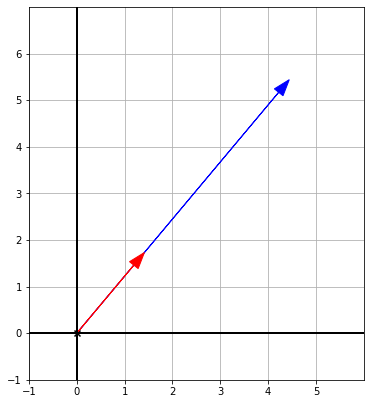

In [64]:
def exercise_2_16():
    w = (sqrt(2), sqrt(3))
    x = (math.pi * w[0], math.pi * w[1])
    draw(
        Arrow(x, color="blue"),
        Arrow(w, color="red")
    )
    
exercise_2_16()

#### Exercise 2.17 
Write a Python function scale(s,v) that multiplies the input vector v by the input scalar s.

In [65]:
def scale(s, v):
    return (s * v[0], s * v[1])


#### Exercise 2.18—Mini Project 
Convince yourself algebraically that scaling the coordinates by a factor also scales the length of the vector by the same factor. Suppose a vector of length c has the coordinates (a, b). Show that for any non- negative real number s, the length of (s · a, s · b) is s · c. (This can’t work for a negative value of s because a vector can’t have a negative length.)

In [83]:
def exercise_2_18():
    def test(s, a, b):
        allowed_error = 0.000000001
        u = (a, b)
        u_length = length(u)
        u_scaled = scale(s, u)
        u_scaled_length = length(u_scaled)
        result = abs(u_scaled_length - (u_length * s)) > allowed_error
        if (result):
            print(f"s: {s}, a: {a}, b: {b}, u_scaled_length: {u_scaled_length}, u_length: {u_length}")
    
    results = [test(s, a, b) for s in range(100) for a in range(100) for b in range(100)]
    any_true = any([test(s, a, b) for s in range(100) for a in range(100) for b in range(100)])
    print(f"any_true: {any_true}")
    
exercise_2_18()

any_true: False


#### Exercise 2.19—Mini Project 
Suppose u = (–1, 1) and v = (1, 1), and suppose r and s are real numbers. Specifically, let’s assume –3 < r < 3 and –1 < s < 1. Where are the possible points on the plane where the vector r · u + s · v could end up?
Note that the order of operations is the same for vectors as it is for numbers. We assume scalar multiplication is carried out first and then vector addition (unless parentheses specify otherwise).

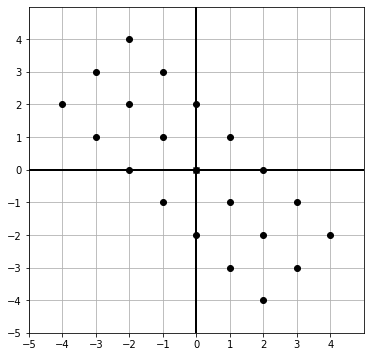

In [106]:
def exercise_2_19():
    u = (-1, 1)
    v = (1, 1)
    def test(r, s):
        return add(scale(r, u), scale(s, v))
    results = [test(r, s) for r in range(-3, 4) for s in range(-1, 2)]
    draw(Points(*results))
    
exercise_2_19()

#### Exercise 2.24 
Write a Python function subtract(v1,v2) that returns the result of v1 – v2, taking two 2D vectors as inputs and returning a 2D vector as an output.

In [91]:
def subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

#### Exercise 2.25 
Write a Python function distance(v1,v2) that returns the dis- tance between two input vectors. (Note that the subtract function from the previous exercise already gives the displacement.)

Write another Python function perimeter(vectors) that takes a list of vectors as an argument and returns the sum of distances from each vector to the next, including the distance from the last vector to the first. What is the perimeter of the dinosaur defined by dino_vectors?

In [107]:
def distance(v1, v2):
    return length(subtract(v1, v2))

def perimeter(vectors):
    return sum([distance(vectors[i - 1], vectors[i]) for i in range(len(vectors))])

def exercise_2_25():
    dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
        (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
        (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
    ]
    
    print(perimeter(dino_vectors))
exercise_2_25()

44.77115093694564


#### Exercise 2.26—Mini Project 
Let u be the vector (1, –1). Suppose there is another vector v with positive integer coordinates (n, m) such that n > m and has a distance of 13 from u. What is the displacement from u to v?
Hint You can use Python to search for the vector v.

In [110]:
def exercise_2_26():
    u = (1, -1)
    for n in range(1, 100):
        for m in range(1, n):
            if length((n, m)) == 13:
                return (n, m)
                        
print(exercise_2_26())

(12, 5)


#### Exercise 2.27 
Confirm that the vector given by Cartesian coordinates (–1.34, 2.68) has a length of approximately 3 as expected.

In [113]:
def exercise_2_27():
    print(length((-1.34, 2.68)))

exercise_2_27()

2.9963310898497184


#### Exercise 2.29 
Turning the question around, suppose we know the length and direction of a vector and want to find its components. What are the x and y com- ponents of a vector with length 15 pointing at a 37° angle?

In [117]:
def exercise_2_29():
    theta = 37.0
    c = 15
    b = math.sin(theta) * c
    a = math.cos(theta) * c
    print(f"sqrt(a ** 2 + b ** 2) = {math.sqrt(a ** 2 + b ** 2)}")
    print(f"a,b,c =  {(a, b, c)}")
    
exercise_2_29()
    

sqrt(a ** 2 + b ** 2) = 15.0
a,b,c =  (11.48121077918015, -9.65307200035499, 15)


#### Exercise 2.30 
Suppose I travel 8.5 units from the origin at an angle of 125°, measured counterclockwise from the positive x-axis. Given that sin(125°) = 0.819 and cos(125°) = – 0.574, what are my final coordinates? Draw a picture to show the angle and path traveled.

In [119]:
def exercise_2_30():
    theta = 125
    c = 8.5
    y = c * 0.819
    x = c * -0.574
    print((x, y))
    
exercise_2_30()

(-4.879, 6.961499999999999)


#### Exercise 2.31 
What are the sine and cosine of 0°? Of 90°? Of 180°? In other words, how many vertical and horizontal units are covered per unit distance in any of these directions?

#### Exercise 2.37 
The following list comprehension creates 1,000 points in polar coordinates:
[(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]
In Python code, convert these to Cartesian coordinates and connect them in a closed loop with line segments to draw a picture.

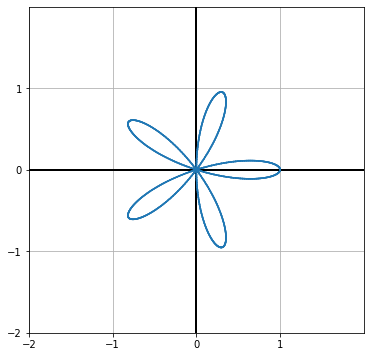

In [130]:
def exercise_2_37():
    polar = [(math.cos(5 * x * math.pi / 500.0), 2 * math.pi * x / 1000.0) for x in range(0,1000)]
    cartesian = [(math.cos(b) * a, math.sin(b) * a) for (a,b) in polar]
    draw(Polygon(*cartesian))
exercise_2_37()

#### Exercise 2.38
Find the angle to get to the point (–2, 3) by “guess-and-check.”



In [140]:
def exercise_2_38():
    p = (-2, 3)
    theta = math.atan2(p[1], p[0])
    print(theta)

exercise_2_38()

2.158798930342464


#### Exercise 2.40 
Without using Python, what are the polar coordinates corre- sponding to the Cartesian coordinates (1, 1) and (1, –1)? Once you’ve found the answers, use to_polar to check your work.

sin(theta) = 1/h
cos(theta) = 1/h
tan(theta) = 1/1

theta = 45

sin(theta) * h = 1
h = 1/sin(theta)
h = 1/cos(theta)

h = 1.414


In [162]:
def calc_angle(origin, p1, p2):
    p1p = subtract(p1, origin)
    p2p = subtract(p2, origin)

    p1_angle = math.degrees(math.atan2(p1p[1], p1p[0]))
    p2_angle = math.degrees(math.atan2(p2p[1], p2p[0]))

    if (p1_angle * p2_angle > 0):
        angle = abs(min(p1_angle - p2_angle, p2_angle - p1_angle))
    else:
        angle = abs(p1_angle + p2_angle)
                

    
    print(f"p1_angle={p1_angle}; p2_angle={p2_angle}")

    return angle
    
    

def exercise_2_41():
    mouth_origin = (-2, 2)
    mouth_p1 = (-5 ,2)
    mouth_p2 = (-5, 1)
    
    mouth_angle = calc_angle(mouth_origin, mouth_p1, mouth_p2)
    print(mouth_angle)
    
    foot_origin = (-1, -4)
    foot_p1 = (0, -3)
    foot_p2 = (1, -4)
    
    foot_angle = calc_angle(foot_origin, foot_p1, foot_p2)
    print(foot_angle)
    
    tail_origin = (6, 4)
    tail_p1 = (5, 1)
    tail_p2 = (3, 1)
    
    tail_angle = calc_angle(tail_origin, tail_p1, tail_p2)
    print(tail_angle)
    
    
exercise_2_41()

p1_angle=180.0; p2_angle=-161.565051177078
18.434948822921996
p1_angle=45.0; p2_angle=0.0
45.0
p1_angle=-108.43494882292202; p2_angle=-135.0
26.565051177077976


#### Exercise 2.42 
Create a rotate(angle, vectors) function that takes an array of input vectors in Cartesian coordinates and rotates those by the specified angle (counterclockwise or clockwise, according to whether the angle is positive or negative).



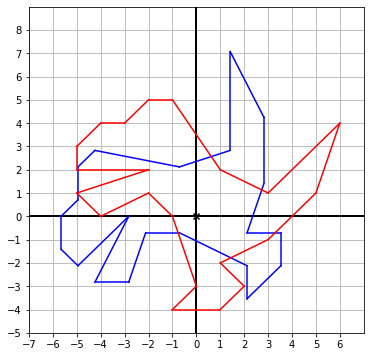

In [175]:
def to_polar(vectors):
    return [(sqrt(v[0] ** 2 + v[1] ** 2), math.atan2(v[1], v[0])) for v in vectors]

def to_cartesian(vectors):
    return [(math.cos(v[1]) * v[0], math.sin(v[1]) * v[0]) for v in vectors]

def rotate(angle, vectors):
    polar_coordinates = to_polar(vectors)
    rotated = [(v[0], v[1] + angle) for v in polar_coordinates]
    return to_cartesian(rotated)
    
def exercise_2_42():
    dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
        (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
        (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
    ]
    rotated = rotate(math.pi/4, dino_vectors)
    draw(
        Polygon(*rotated, color="blue"),
        Polygon(*dino_vectors, color="red")
    )

exercise_2_42()

#### Exercise 2.43 
Create a function regular_polygon(n) that returns Cartesian coordinates for the vertices of a regular n-sided polygon (that is, having all angles and side lengths equal). For instance, polygon(7) produces vectors defining the following heptagon:

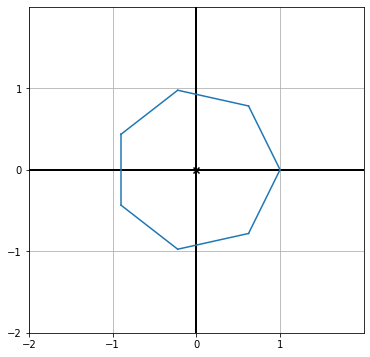

In [187]:
def regular_polygon(n):
    vectors = [(1, 0)] * n
    polar_vectors = to_polar(vectors)
    rotated_vectors = [(pv[0], pv[1] + ((2 * math.pi / n) * i)) for i,pv in enumerate(polar_vectors)]
    return to_cartesian(rotated_vectors)

def exercise_2_43():
    draw(
        Polygon(*regular_polygon(7))
    )
  
exercise_2_43()